<a href="https://colab.research.google.com/github/vals124/MyFirstPullRequest/blob/master/Data_Wrangling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Wrangling with R

Today's goal is to get familiar with some of the basics of working with data using R's [tidyverse](https://www.tidyverse.org/) environment.

Tidyverse is a set of packages written for the statistical software R that is optimized for data science.

There are many components to the tidyverse, but we will focus on three packages in particular:


*   Getting data into "tidy" format using `tidyr`
*   Manipulating or "wrangling" data for analysis using `dplyr`
* Visualizing data using `ggplot2`

The overarching goal is to give you the basic tools for data exploration and visualization as quickly as possible.

The workflow and philosophy of how this works is captured in this figure from the excellent [R for Data Science](https://r4ds.hadley.nz/) book by Hadley Wickham (the main author of the tidyverse packages).

The goal of these packages is to give you the tools to:
* **import** your data for analysis
* bring the data into a standard, consistent, **tidy** format
* **transform** the data according to your analysis needs
* **visualize** the data in the service of understanding it

Modeling it is very important too, but is not the focus in this first dive into working with data in R.



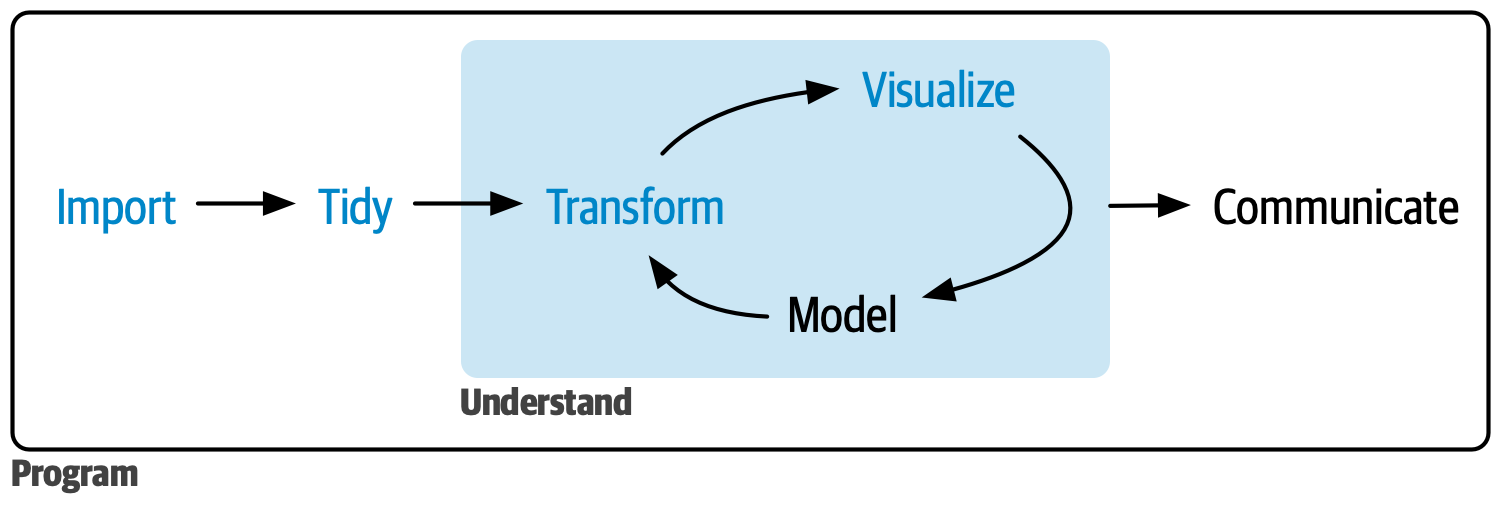

In this tutorial, we will be using a google colab notebook to make it easy for everyone to work along with the code (no need to download any software).

However, if you do plan to use R regularly, I highly recommend downloading [R](https://www.r-project.org/) and [RStudio](https://posit.co/download/rstudio-desktop/) to have a local environment for working with R.

##0. Setting Up: Loading the tidyverse packages
Before working through this notebook, make sure that your runtime is set to use R (rather than python). This should be set already, but you can double-check by selecting the following from the menu at the top of the notebook.

  Runtime > Change runtime type

Then make sure that R appears in the drop-down menu under runtime type.

This first part of the code just installs and loads the R packages we want to use for the following analyses.

In [ ]:
#Install packages we want to use

#this loads a helper function for installing R packages
source('https://raw.githubusercontent.com/COGS119/tutorials/refs/heads/main/R/load_install_packages.R')

#specify the name of all packages we want to use her
packages_to_apt_install = c('tidyverse','palmerpenguins')

#install packages specified above (note that we're using our old friend the for loop, this time in R syntax) into our google colab environment
#For more: https://www.w3schools.com/r/r_for_loop.asp
for (package in packages_to_apt_install) load_install_package(package, apt=TRUE)

#load packages we want to use
library(tidyverse)

#set some basic plotting defaults
theme_set(theme_minimal(base_size = 18))

#check the version of R used
print(R.version.string)


[1] "R version 4.4.2 (2024-10-31)"


##1. (Tidy) Data

Here's the basic idea behind "tidy" data.

In "tidy" data,...

... every row is a **single observation** (e.g., a trial in experiments)

... every column is a **variable** with a **value** describing that observation


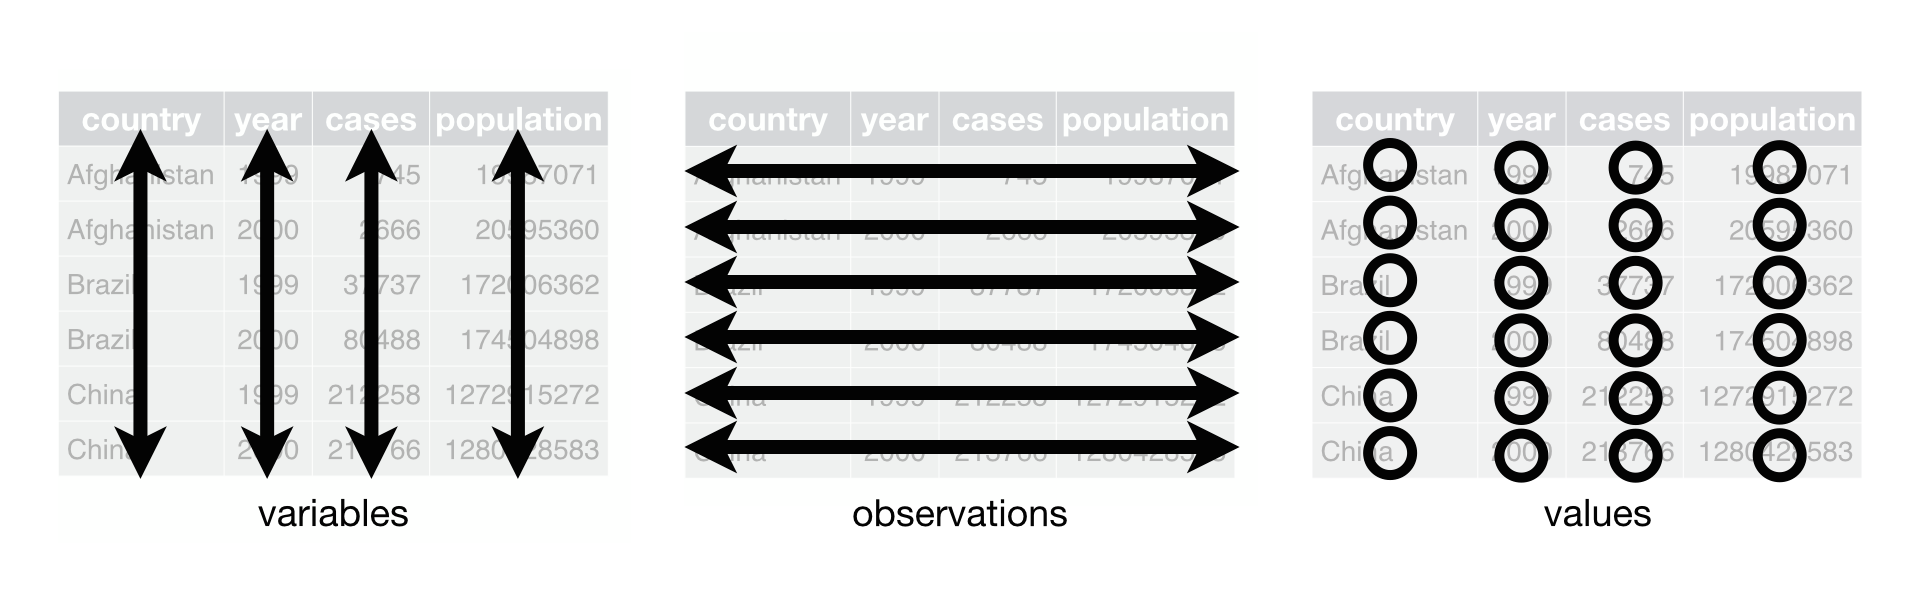

For this first introduction, we will use Allison Horst's `palmerpenguins` dataset: https://allisonhorst.github.io/palmerpenguins/

The dataset contains information about 344 penguins, from 3 different species of penguins that live on 3 islands in the Palmer Archipelago, Antarctica.

Here's a cute drawing of the three penguin species: Chinstrap, Gentoo and Adelie!

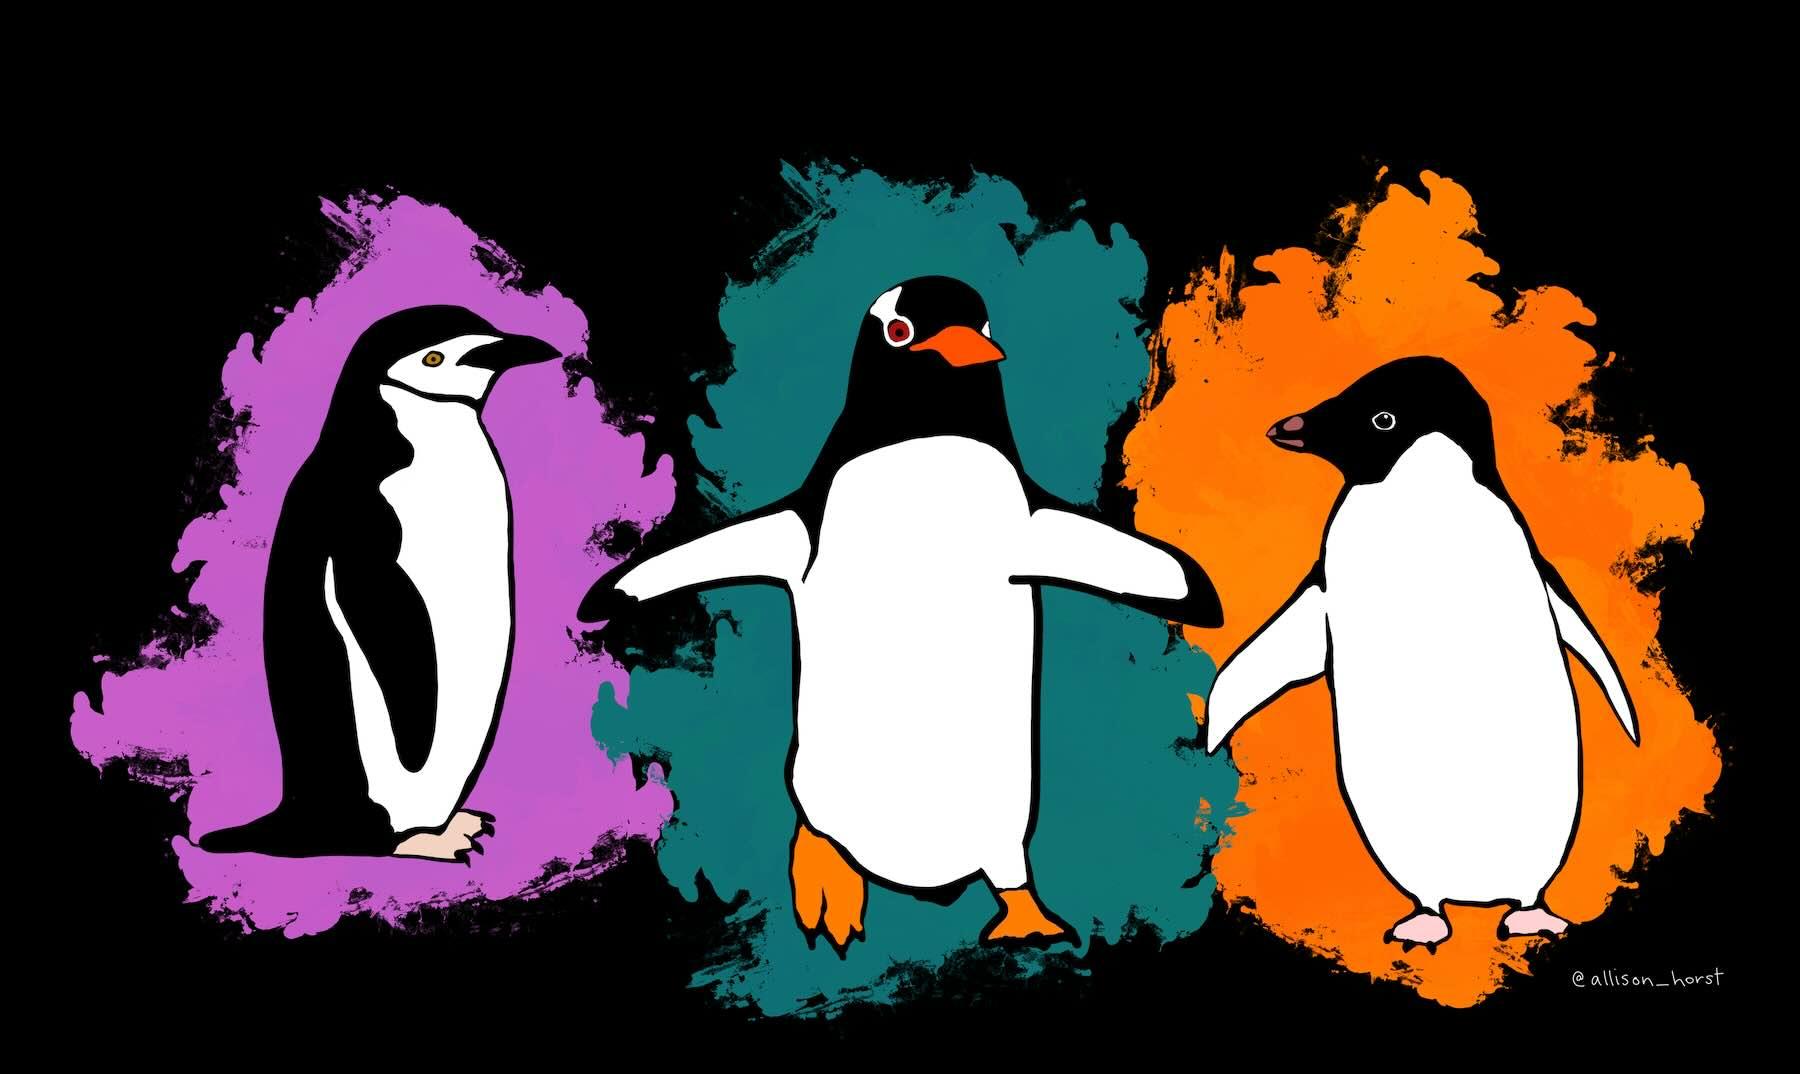

Let's load the data and take a peek!

In [ ]:
# look at the data
penguins

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_to_length
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,0.4782609
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,0.4405063
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,0.4466501
Adelie,Torgersen,NA,NA,NA,NA,NA,2007,NA
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,0.5258856
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,0.5241730
Adelie,Torgersen,38.9,17.8,181,3625,female,2007,0.4575835
Adelie,Torgersen,39.2,19.6,195,4675,male,2007,0.5000000
Adelie,Torgersen,34.1,18.1,193,3475,NA,2007,0.5307918


That's a lot of data! To get a more manageable peek, you can use `glimpse()`

In [ ]:
glimpse(penguins)

Rows: 344
Columns: 9
$ species              <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, A…
$ island               <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torge…
$ bill_length_mm       <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.…
$ bill_depth_mm        <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.…
$ flipper_length_mm    <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, …
$ body_mass_g          <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 347…
$ sex                  <fct> male, female, female, NA, female, male, female, m…
$ year                 <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2…
$ bill_depth_to_length <dbl> 0.4782609, 0.4405063, 0.4466501, NA, 0.5258856, 0…


Each row in the data represents the data from one penguin on one of the 3 islands. Let's think about what each of our columns means.


*   **species**: the species that the penguin belongs to (Chinstrap, Gentoo and Adelie)
*   **island**: the island that the penguin lives on (Biscoe, Dream, Torgersen)
* information about the penguins' general size and dimensions:
  * **bill_length_mm**: bill length in mm
  * **bill_depth_mm**: bill depth in mm
  * **flipper_length_mm**: flipper length in mm
  * **body_mass_g**: body mass in grams
* **sex**: the sex of the penguin
* **year**: the year the penguin was observed



This data is in tidy format!

... every row corresponds to a single observation (of a penguin)

... each column is a variable with a single value for each observation (penguin)

One useful tip: an easy way to access individual columns in a data frame (or "tibble") is to use the `$` character. So, for example, to access all of the bill lengths we can do `penguins$bill_length_mm`

In [ ]:
#access the bill length column
penguins$bill_depth_mm

[1] 18.7 17.4 18.0   NA 19.3 20.6 17.8 19.6 18.1 20.2 17.1 17.3 17.6 21.2 21.1
 [16] 17.8 19.0 20.7 18.4 21.5 18.3 18.7 19.2 18.1 17.2 18.9 18.6 17.9 18.6 18.9
 [31] 16.7 18.1 17.8 18.9 17.0 21.1 20.0 18.5 19.3 19.1 18.0 18.4 18.5 19.7 16.9
 [46] 18.8 19.0 18.9 17.9 21.2 17.7 18.9 17.9 19.5 18.1 18.6 17.5 18.8 16.6 19.1
 [61] 16.9 21.1 17.0 18.2 17.1 18.0 16.2 19.1 16.6 19.4 19.0 18.4 17.2 18.9 17.5
 [76] 18.5 16.8 19.4 16.1 19.1 17.2 17.6 18.8 19.4 17.8 20.3 19.5 18.6 19.2 18.8
 [91] 18.0 18.1 17.1 18.1 17.3 18.9 18.6 18.5 16.1 18.5 17.9 20.0 16.0 20.0 18.6
[106] 18.9 17.2 20.0 17.0 19.0 16.5 20.3 17.7 19.5 20.7 18.3 17.0 20.5 17.0 18.6
[121] 17.2 19.8 17.0 18.5 15.9 19.0 17.6 18.3 17.1 18.0 17.9 19.2 18.5 18.5 17.6
[136] 17.5 17.5 20.1 16.5 17.9 17.1 17.2 15.5 17.0 16.8 18.7 18.6 18.4 17.8 18.1
[151] 17.1 18.5 13.2 16.3 14.1 15.2 14.5 13.5 14.6 15.3 13.4 15.4 13.7 16.1 13.7
[166] 14.6 14.6 15.7 13.5 15.2 14.5 15.1 14.3 14.5 14.5 15.8 13.1 15.1 14.3 15.0
[181] 14.3 15.3 15.3 14.2 14.5 17.0 14.8 16.3 13.7 17.3 13.6 15.7 13.7 16.0 13.7
[196] 15.0 15.9 13.9 13.9 15.9 13.3 15.8 14.2 14.1 14.4 15.0 14.4 15.4 13.9 15.0
[211] 14.5 15.3 13.8 14.9 13.9 15.7 14.2 16.8 14.4 16.2 14.2 15.0 15.0 15.6 15.6
[226] 14.8 15.0 16.0 14.2 16.3 13.8 16.4 14.5 15.6 14.6 15.9 13.8 17.3 14.4 14.2
[241] 14.0 17.0 15.0 17.1 14.5 16.1 14.7 15.7 15.8 14.6 14.4 16.5 15.0 17.0 15.5
[256] 15.0 13.8 16.1 14.7 15.8 14.0 15.1 15.2 15.9 15.2 16.3 14.1 16.0 15.7 16.2
[271] 13.7   NA 14.3 15.7 14.8 16.1 17.9 19.5 19.2 18.7 19.8 17.8 18.2 18.2 18.9
[286] 19.9 17.8 20.3 17.3 18.1 17.1 19.6 20.0 17.8 18.6 18.2 17.3 17.5 16.6 19.4
[301] 17.9 19.0 18.4 19.0 17.8 20.0 16.6 20.8 16.7 18.8 18.6 16.8 18.3 20.7 16.6
[316] 19.9 19.5 17.5 19.1 17.0 17.9 18.5 17.9 19.6 18.7 17.3 16.4 19.0 17.3 19.7
[331] 17.3 18.8 16.6 19.9 18.8 19.4 19.5 16.5 17.0 19.8 18.1 18.2 19.0 18.7

To get a little bit excited, let's start out by diving right into visualization to flex our new powers. Don't worry too much about the details just yet. We'll explain some of the basics in more depth over the next week. This is just to get a quick sense of why it might be cool to learn more about working with data in R.

Let's say I want to do a scatterplot of bill length by bill depth. Creating that plot using ggplot in R is as simple as the following:

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


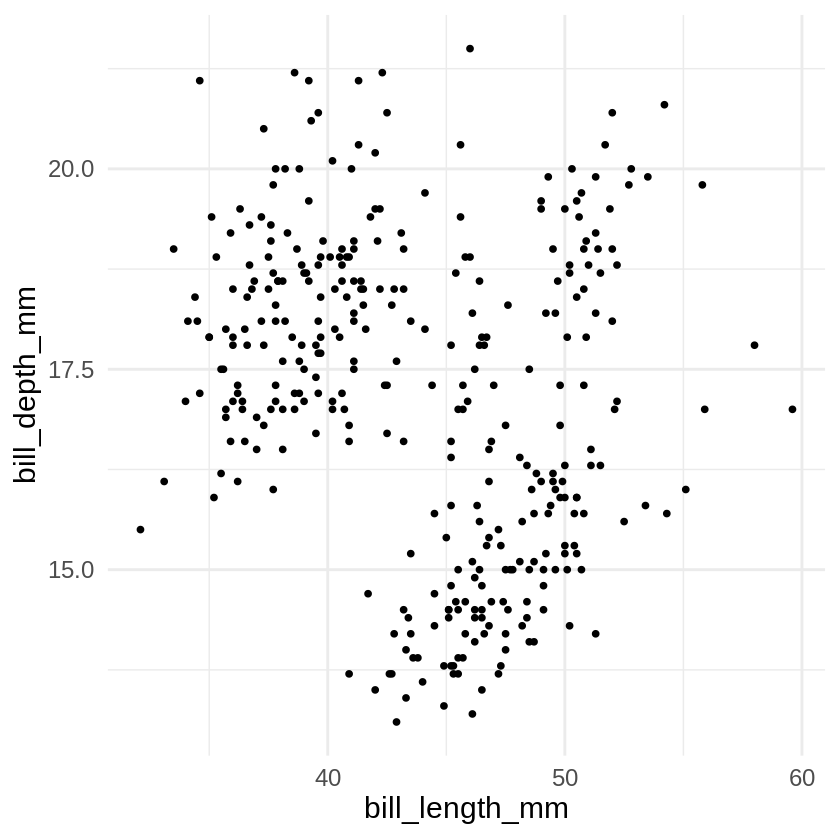

In [ ]:
# the ggplot call sets up the basic structure of the graph
# first, we specify the dataset we want to use
# then, we specify the key "aesthetics" with aes:
# what's on x-axis? what's on the y-axis?
ggplot(data = penguins, aes(x = bill_length_mm, y = bill_depth_mm)) +
  # different "geoms" define what type of structure we plot. In this case, we use geom_point() to plot individual dots for each observation
  geom_point()

Interesting!! Now, I know there are three species of penguin. Are there any systematicities in bill length and bill depth across them? To see, let's try to highlight the color of the dots for each species.

**Advanced:** Why do you think we're getting the warning message we see?

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


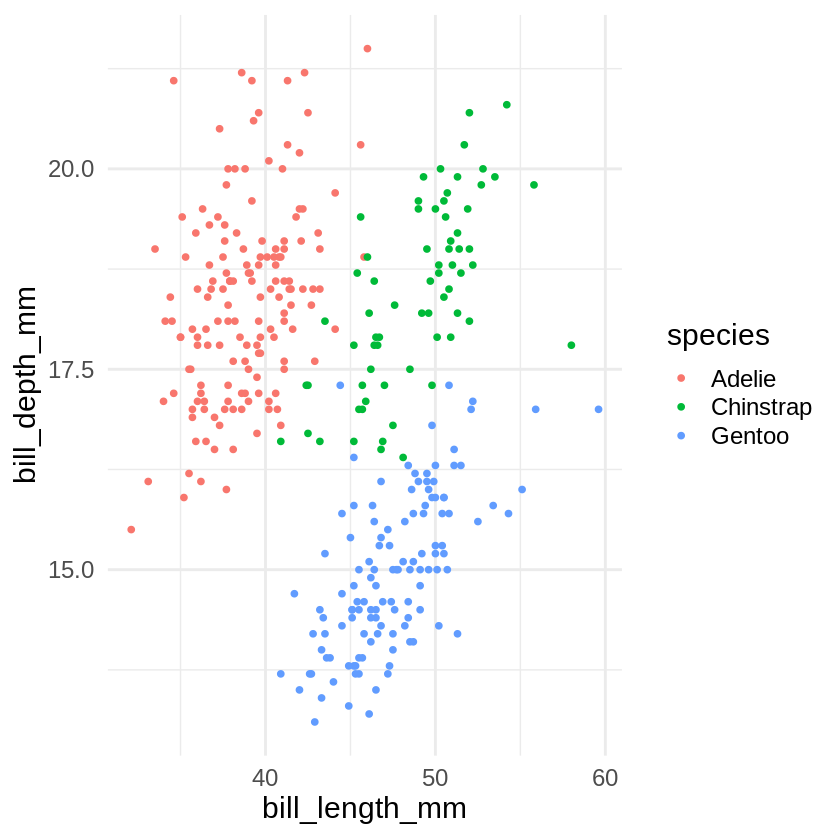

In [ ]:
# add color, defined by the species column, to the aes() call
ggplot(data = penguins, aes(x = bill_length_mm, y = bill_depth_mm, color=species)) +
  geom_point()

Oooo, now I see that there's something systematic happening here. Let's put some final touches on this graph so that it looks a bit better:
* Change the color scheme to something more attractive
* rename the axes for humans

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


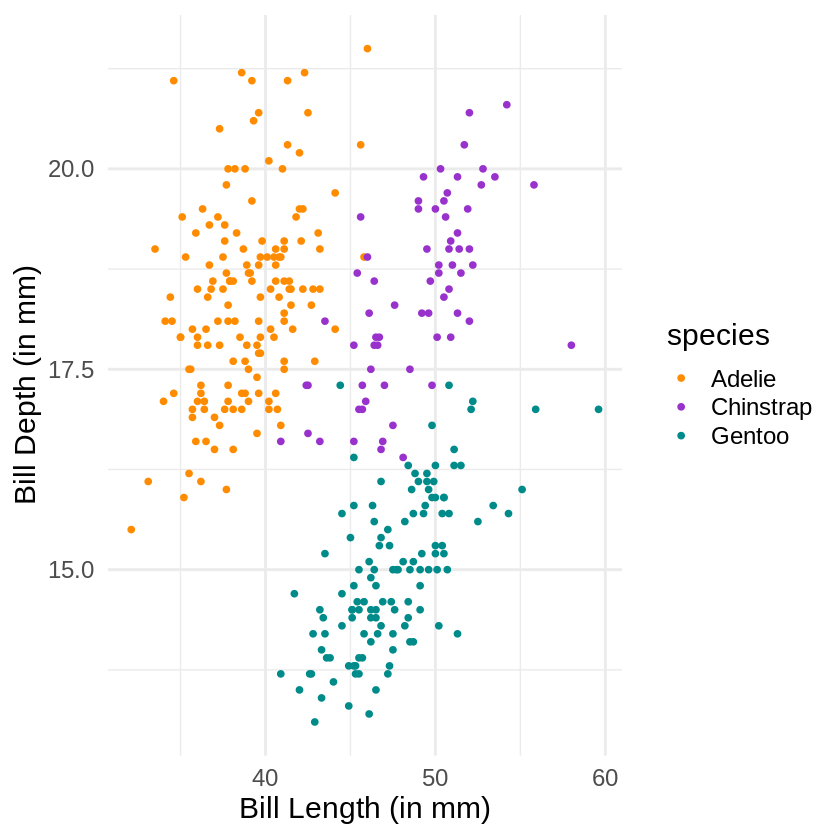

In [ ]:
# scatterplot example: penguin bill length versus bill depth
ggplot(data = penguins, aes(x = bill_length_mm, y = bill_depth_mm, color=species)) +
  geom_point()  +
  # change colors manually
  scale_color_manual(values = c("darkorange","darkorchid","cyan4"))+
  # rename axes
  xlab("Bill Length (in mm)")+
  ylab("Bill Depth (in mm)")

##2. Some coding basics

To get warmed up, let's get familiar with two key concepts in R:

* functions
* pipes



###Functions
We'll start with the concept of a function.

Just like in other programming languages, a function is a way to **do** something to a data object. It takes an argument (or a series of arguments) and returns a value.

A nice example in R is `mean()`. `mean()` takes an argument, a numeric vector, and returns the average. `mean()` also has a second argument, `na.rm=TRUE`, that can tell it to ignore missing values (this is useful in our penguins dataset).

So, to compute the average bill depth, we can write the following code:

In [ ]:
#compute the average bill depth
mean(penguins$bill_depth_mm,na.rm=TRUE)

[1] 17.15117

Hmm, that's a lot of decimal places... It would be nice to clean this up a bit by rounding off after a few decimals. Conveniently, R provides a `round()` function that does just that! (it takes a second argument, digits, that tells it how many decimal places to round to).



In [ ]:
#round the average value
round(mean(penguins$bill_depth_mm,na.rm=TRUE),digits=2)

[1] 17.15

While it's nice to be able to strong functions together this way, that line is already looking kind of complicated. Is there an easier way to apply functions sequentially, one after the other? We'll return to this in a moment.

R supplies all sorts of functions that are useful for data analysis. For example, see if you can figure out how heavy the chonkiest penguin is.

**Tip**: The function for the finding the maximum value of a list/vector in R is `max()`

**Tip #2**: If you run into missing values, you can ignore them using the parameter `na.rm=TRUE`. So `max(my_vector,na.rm=TRUE)`.

In [ ]:
#Find the maximum weight in the body_mass_g column


###Pipes

We already noticed that the code starts to look complicated once we have to start nesting functions, e.g. `round(mean(penguins$bill_depth_mm,na.rm=TRUE),digits=2)`. This is pretty hard to read and figure out what's going on!

This motivates the intuition behind why a **pipe** operator `|>` (or alternatively `%>%`) is useful.

Pipes are just a way of bringing the main argument we supply to a function to the front of the operation. For example, to compute the mean of bill depth, we can write the following instead, using the pipe operator:

In [ ]:
#compute the mean using a pip
penguins$bill_depth_mm |>
  mean(na.rm=TRUE)

[1] 17.15117

This allows us to string functions together - basic as many as we want - in the order that we would like to do them. What's nice about this is that it makes the code much more legible, and it allows us to write the code in their intuitive order.

For example, rather than having to write the nested code above, where the `mean()` function is nested within the `round()` function, we can use the pipe operator to write the sequence of operations out in order, for much cleaner code - we can just read off the sequence of actions we're performing, in order!

In [ ]:
penguins$bill_depth_mm |>
  mean(na.rm=TRUE) |>
  round(digits=2)

[1] 17.15

##3. Working with Data: Some key tidyverse verbs

In this section, we're going to become familiar with some of the key tidyverse "verbs": tidyverse functions for quickly and easily manipulating ("wrangling") data.

There are many of these functions, but for know, we'll get to know the following key verbs:

* pull()  
* filter()
* mutate()
* summarize()
* group_by()

**NOTE:** Tidyverse functions often have very intuitive names, but always be sure to check and make sure you understand what they do by reading the documentation!

You can always get help on a given function by typing `?function_name` (e.g., `?pull`).



###Pull
Let's get to know our first verb: `pull()`.

See its documentation [here](https://dplyr.tidyverse.org/reference/pull.html).

This verb allows us to "pull" the data from specific columns in our dataset - so it provides an alternative to using the `$` operator. So, an alternative way to access a column in the penguins dataset is given below.



In [ ]:
#first, read more about pull
#note: the formatting looks weird in google colab -
#it's much nicer if you look up the actual R documentation
?pull
#now, pull data from the bill depth column
penguins |>
  pull(bill_depth_mm)

[1] 18.7 17.4 18.0   NA 19.3 20.6 17.8 19.6 18.1 20.2 17.1 17.3 17.6 21.2 21.1
 [16] 17.8 19.0 20.7 18.4 21.5 18.3 18.7 19.2 18.1 17.2 18.9 18.6 17.9 18.6 18.9
 [31] 16.7 18.1 17.8 18.9 17.0 21.1 20.0 18.5 19.3 19.1 18.0 18.4 18.5 19.7 16.9
 [46] 18.8 19.0 18.9 17.9 21.2 17.7 18.9 17.9 19.5 18.1 18.6 17.5 18.8 16.6 19.1
 [61] 16.9 21.1 17.0 18.2 17.1 18.0 16.2 19.1 16.6 19.4 19.0 18.4 17.2 18.9 17.5
 [76] 18.5 16.8 19.4 16.1 19.1 17.2 17.6 18.8 19.4 17.8 20.3 19.5 18.6 19.2 18.8
 [91] 18.0 18.1 17.1 18.1 17.3 18.9 18.6 18.5 16.1 18.5 17.9 20.0 16.0 20.0 18.6
[106] 18.9 17.2 20.0 17.0 19.0 16.5 20.3 17.7 19.5 20.7 18.3 17.0 20.5 17.0 18.6
[121] 17.2 19.8 17.0 18.5 15.9 19.0 17.6 18.3 17.1 18.0 17.9 19.2 18.5 18.5 17.6
[136] 17.5 17.5 20.1 16.5 17.9 17.1 17.2 15.5 17.0 16.8 18.7 18.6 18.4 17.8 18.1
[151] 17.1 18.5 13.2 16.3 14.1 15.2 14.5 13.5 14.6 15.3 13.4 15.4 13.7 16.1 13.7
[166] 14.6 14.6 15.7 13.5 15.2 14.5 15.1 14.3 14.5 14.5 15.8 13.1 15.1 14.3 15.0
[181] 14.3 15.3 15.3 14.2 14.5 17.0 14.8 16.3 13.7 17.3 13.6 15.7 13.7 16.0 13.7
[196] 15.0 15.9 13.9 13.9 15.9 13.3 15.8 14.2 14.1 14.4 15.0 14.4 15.4 13.9 15.0
[211] 14.5 15.3 13.8 14.9 13.9 15.7 14.2 16.8 14.4 16.2 14.2 15.0 15.0 15.6 15.6
[226] 14.8 15.0 16.0 14.2 16.3 13.8 16.4 14.5 15.6 14.6 15.9 13.8 17.3 14.4 14.2
[241] 14.0 17.0 15.0 17.1 14.5 16.1 14.7 15.7 15.8 14.6 14.4 16.5 15.0 17.0 15.5
[256] 15.0 13.8 16.1 14.7 15.8 14.0 15.1 15.2 15.9 15.2 16.3 14.1 16.0 15.7 16.2
[271] 13.7   NA 14.3 15.7 14.8 16.1 17.9 19.5 19.2 18.7 19.8 17.8 18.2 18.2 18.9
[286] 19.9 17.8 20.3 17.3 18.1 17.1 19.6 20.0 17.8 18.6 18.2 17.3 17.5 16.6 19.4
[301] 17.9 19.0 18.4 19.0 17.8 20.0 16.6 20.8 16.7 18.8 18.6 16.8 18.3 20.7 16.6
[316] 19.9 19.5 17.5 19.1 17.0 17.9 18.5 17.9 19.6 18.7 17.3 16.4 19.0 17.3 19.7
[331] 17.3 18.8 16.6 19.9 18.8 19.4 19.5 16.5 17.0 19.8 18.1 18.2 19.0 18.7

Note that we can now rewrite the code above computing the (rounded) mean to go "full tidyverse", using only tidyverse functions and concatenating the functions using the pipe operator. Can you figure out how?

In [ ]:
#take the penguin dataset
#pull the bill depth column
#compute the mean, and
#round to 2 decimal places
penguins |>
  pull(bill_depth_mm) |>
  mean(na.rm=TRUE) |>
  round(digits=2)

[1] 17.15

###Filter

OK, let's learn something new.

There are lots of reasons you might want to remove rows from your dataset, including getting rid of outliers, selecting subpopulations, and so forth. For this purpose, `filter()` is a verb (a function in the tidyverse) that takes a data frame as its first argument, and then as its other argument(s) takes the condition(s) you want to filter on.

For example, if we want to just look at the data for those cute Chinstrap penguins, we can do

In [ ]:
penguins |>
  filter(species == "Chinstrap")

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_to_length
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>
Chinstrap,Dream,46.5,17.9,192,3500,female,2007,0.3849462
Chinstrap,Dream,50.0,19.5,196,3900,male,2007,0.3900000
Chinstrap,Dream,51.3,19.2,193,3650,male,2007,0.3742690
Chinstrap,Dream,45.4,18.7,188,3525,female,2007,0.4118943
Chinstrap,Dream,52.7,19.8,197,3725,male,2007,0.3757116
Chinstrap,Dream,45.2,17.8,198,3950,female,2007,0.3938053
Chinstrap,Dream,46.1,18.2,178,3250,female,2007,0.3947939
Chinstrap,Dream,51.3,18.2,197,3750,male,2007,0.3547758
Chinstrap,Dream,46.0,18.9,195,4150,female,2007,0.4108696


We can also specify multiple filtering conditions. For example, if we wanted to look at only the Chinstrap penguins that weigh more than 4000g, we could write:

In [ ]:
#select only Chinstrap penguins > 4000g
penguins |>
  filter(species=="Chinstrap",body_mass_g>4000)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_to_length
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>
Chinstrap,Dream,46.0,18.9,195,4150,female,2007,0.4108696
Chinstrap,Dream,52.0,18.1,201,4050,male,2007,0.3480769
Chinstrap,Dream,50.5,19.6,201,4050,male,2007,0.3881188
Chinstrap,Dream,49.2,18.2,195,4400,male,2007,0.3699187
Chinstrap,Dream,52.0,19.0,197,4150,male,2007,0.3653846
Chinstrap,Dream,52.8,20.0,205,4550,male,2008,0.3787879
Chinstrap,Dream,54.2,20.8,201,4300,male,2008,0.3837638
Chinstrap,Dream,51.0,18.8,203,4100,male,2008,0.3686275
Chinstrap,Dream,52.0,20.7,210,4800,male,2008,0.3980769


Mini exercises:

1. Can you filter the data to all of the male Gentoo penguins?
2. Can you compute the average bill length of Adelie penguins?

In [ ]:
#filter to only male Gentoo penguins

In [ ]:
# compute the average bill length of Adelie penguins

###Mutate

Adding columns to data frames is usually done to compute some kind of derived variable. `mutate()` is the verb for these situations – it allows you to add a column to your dataset (or change one that already exists).

`mutate()` takes name-value pairs where the name gives the name of the column in the output, and the value is a expression for what value to put in that column.

Let's add a column that computes bill depth to length

In [ ]:
#compute bill depth proportional to length
#very low means very long and thin beaks
#high means short and stout beaks
penguins |>
  mutate(bill_depth_to_length = bill_depth_mm / bill_length_mm)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_to_length
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,0.4782609
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,0.4405063
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,0.4466501
Adelie,Torgersen,NA,NA,NA,NA,NA,2007,NA
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,0.5258856
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,0.5241730
Adelie,Torgersen,38.9,17.8,181,3625,female,2007,0.4575835
Adelie,Torgersen,39.2,19.6,195,4675,male,2007,0.5000000
Adelie,Torgersen,34.1,18.1,193,3475,NA,2007,0.5307918


To store the dataset with the new column, we need assign our new dataset to a variable.

In R, we use `<-` to assign a value to a variable name (`=` is ok too for the purposes of this course).

So, to store the new column in our penguins dataset, we can just assign the new data frame to our `penguins` variable.




In [ ]:
#add the new column and store it in penguins
penguins <- penguins |>
  mutate(bill_depth_to_length = bill_depth_mm / bill_length_mm)

#check out our new penguins data frame
#we have a new column!
penguins

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_depth_to_length
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,0.4782609
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,0.4405063
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,0.4466501
Adelie,Torgersen,NA,NA,NA,NA,NA,2007,NA
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,0.5258856
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,0.5241730
Adelie,Torgersen,38.9,17.8,181,3625,female,2007,0.4575835
Adelie,Torgersen,39.2,19.6,195,4675,male,2007,0.5000000
Adelie,Torgersen,34.1,18.1,193,3475,NA,2007,0.5307918


###Summarize

We sometimes want to summarize across multiple observations in describing our data. This is where `summarize()` comes in.

What `summarize()` does is to apply a function to a part of the dataset to create a new summary dataset.

For example, let's redo our code computing the average bill length using `summarize()`

In [ ]:
#compute the average bill length
penguins |>
  summarize(avg_bill_length = mean(bill_length_mm,na.rm=TRUE))

avg_bill_length
<dbl>
43.92193


We can create a dataset with multiple new summarized columns using `summarize()`.

For example, `n()` is a function that counts up all of the observations. So, we can also add a column with the total number of observations using the code below.

**Tip:** each specifying how to compute a new column should be separated from the next using a comma.





In [ ]:
penguins |>
  summarize(
    number_penguins = n(),
    avg_bill_length = mean(bill_length_mm,na.rm=TRUE)
  )

number_penguins,avg_bill_length
<int>,<dbl>
344,43.92193


###Grouping and summarizing

Ok, is still a little boring. But these functions become very powerful once you bring in the concept of grouping using `group_by()`.

`group_by()` adds a grouping marker to your dataset. Subsequent verbs like `summarize()` then use that grouping variable when performing their operation. So, concretely, summarize will apply its functions *by each data group*. Let's see how this works in practice.

Let's say I want to summarize the average bill length *for each penguin species*. This is now as simple as adding just one grouping, using `group_by()`, prior to summarizing:





In [ ]:
#summarize average bill length by group
#notice that we are now counting the number of penguins by species too!
penguins |>
  group_by(species) |>
  summarize(
    number_penguins = n(),
    avg_bill_length = mean(bill_length_mm,na.rm=TRUE)
  )

species,number_penguins,avg_bill_length
<fct>,<int>,<dbl>
Adelie,152,38.79139
Chinstrap,68,48.83382
Gentoo,124,47.50488


We can also apply multiple groupings in order to get data that is further nested. For example, to get a breakdown not only by species, but also by each island for each species, we can just add the `island` column to `group_by()`.

In [ ]:
#summarize by species AND island
penguins |>
  group_by(species,island) |>
  summarize(
    number_penguins = n(),
    avg_bill_length = mean(bill_length_mm,na.rm=TRUE)
  )

`summarise()` has grouped output by 'species'. You can override using the
`.groups` argument.


species,island,number_penguins,avg_bill_length
<fct>,<fct>,<int>,<dbl>
Adelie,Biscoe,44,38.97500
Adelie,Dream,56,38.50179
Adelie,Torgersen,52,38.95098
Chinstrap,Dream,68,48.83382
Gentoo,Biscoe,124,47.50488


Turns out that only one penguin appears on all three islands - the other two were only observed on one island!

### Finale

You've learned some of the most important tidyverse verbs!

To briefly give you a glimpse of why this can be so useful, here's how you could apply these verbs to wrangle the data into shape for a cool plot.

Let's create a barplot showing the average bill length, for each penguin species.

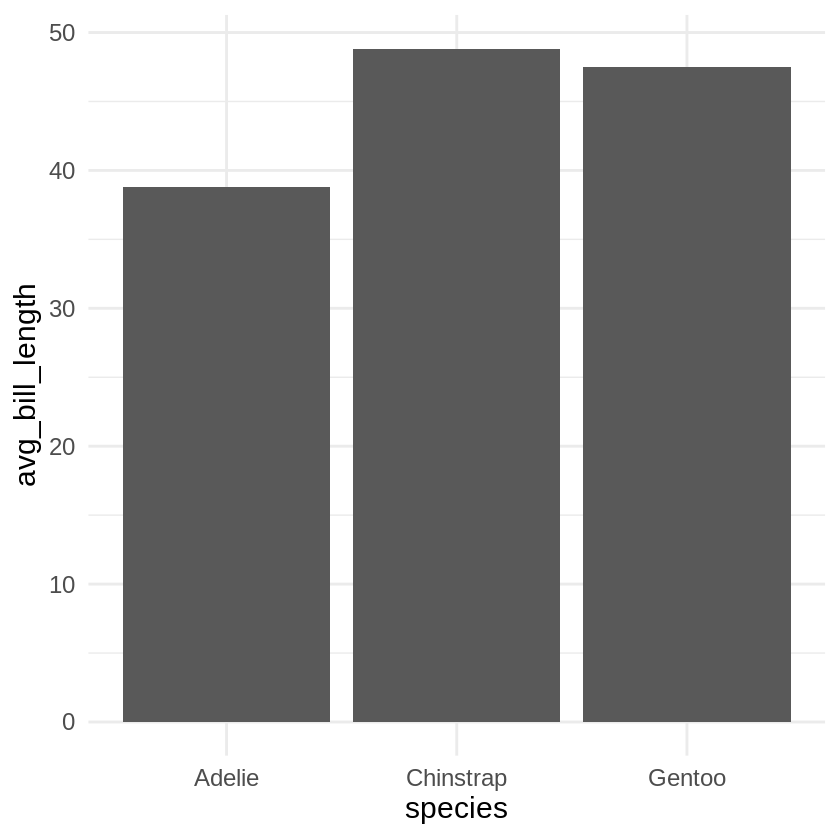

In [ ]:
#barplot of average bill length, by penguin species
summarized_species_info <- penguins |>
  group_by(species) |>
  summarize(
    avg_bill_length = mean(bill_length_mm,na.rm=TRUE)
  )

#create a simple bar plot
ggplot(summarized_species_info,aes(x = species, y = avg_bill_length))+
  geom_bar(stat="identity")

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


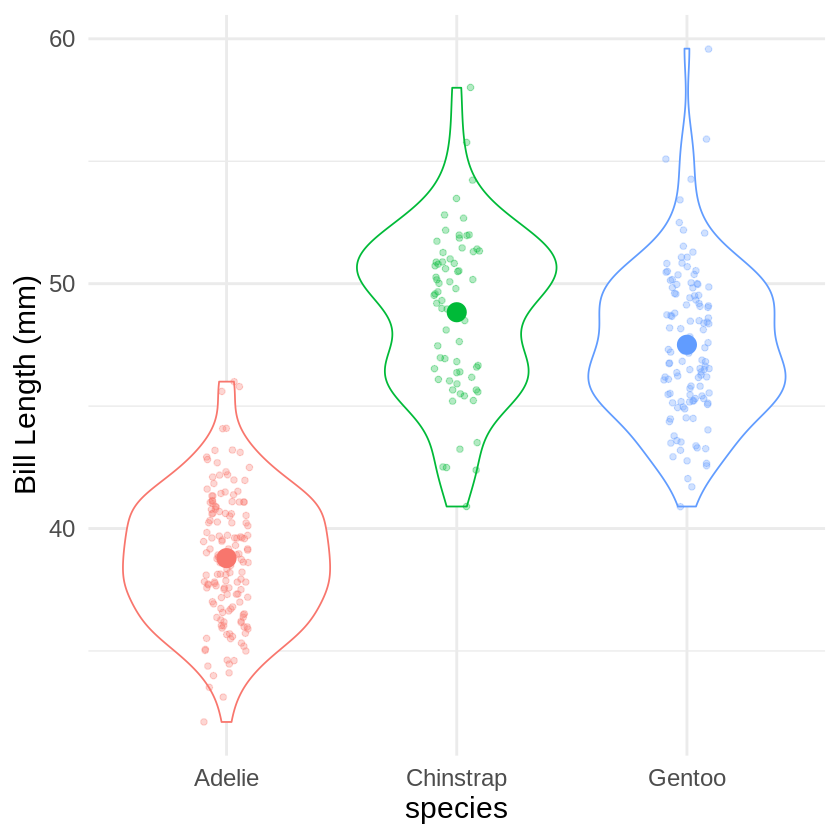

In [ ]:
# Let's make the plot fancier and add in the raw data points!
ggplot(summarized_species_info,aes(x = species, y = avg_bill_length,color=species))+
  geom_violin(data=penguins,aes(y = bill_length_mm)) +
  geom_jitter(data=penguins,aes(y = bill_length_mm),width=0.1,alpha=0.3)+
  geom_point(stat="identity",fill=NA,size=5)+
  ylab("Bill Length (mm)")+
  theme(legend.position="none")

## 4. Working with Experiment Data

Now, let's work with a (cleaned-up) version of the type of data you'll be working with in your experiment.

This data is from [Zettersten & Lupyan (2020)](https://drive.google.com/file/d/1kpNFFcPdA9XiL4jseJtnrE3gdUOWkg66/view?usp=drive_link) (one of the experiments not chosen for a project).

In the experiment, participants figure out which of two categories (A or B) a given image belongs to through trial and error. Over time (24 trials, organized into three blocks of 8 trials each), they start to learn the category structure. The key manipulation is a between-subjects condition: in the high nameability condition, the features of the images (in this case, colors) are very easy to name (e.g., blue, orange). In the low nameability condition, the colors are very difficult to name (e.g., sienna, mauve). The finding is that categories were easier to learn when the color features were more nameable.

The data here presents the **actual** data from the first two experiments in the paper (1A and 1B). The experiments are structurally identical - they just use slightly different arrangements of colors.

###4.1. Load the data


In [ ]:
#read in the data we'll use
#data from: Zettersten & Lupyan (2020)
#https://drive.google.com/file/d/1kpNFFcPdA9XiL4jseJtnrE3gdUOWkg66/view?usp=drive_link
nameability_data <- read_csv("https://raw.githubusercontent.com/COGS119/tutorials/refs/heads/main/R/nameability_exercise.csv")

Rows: 2400 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experiment, subject, condition, image_name
dbl (3): total_trial_num, block_num, is_right

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


###4.2. Understand the structure of the data

First, let's understand how our data is structured. Here's another way to take a first peek at your data.

In [ ]:
nameability_data |> View()

experiment,subject,condition,total_trial_num,block_num,image_name,is_right
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1A,p150212,low,1,1,low_B_111,1
1A,p150212,low,2,1,low_A_000,1
1A,p150212,low,3,1,low_A_000,1
1A,p150212,low,4,1,low_B_110,1
1A,p150212,low,5,1,low_B_101,0
1A,p150212,low,6,1,low_B_111,1
1A,p150212,low,7,1,low_A_001,0
1A,p150212,low,8,1,low_A_010,1
1A,p150212,low,9,2,low_B_110,1


The data contains the following columns:

* experiment: the name of the experiment in the paper (1A or 1B)
* subject: the unique participant id
* condition: nameability condition (high or low)
* total_trial_num: the trial number (1-24)
* block_num: the block number (3 blocks of 8 trials each)
* image_name: the name of the stimulus to be categorized
* is_right: whether the response was correct (is_right=1) or incorrect (is_right=0)

Is the data in tidy format? Why/ why not?

###4.3. Summarize the data from Experiment 1A

Let's summarize the average accuracy for each participant from Experiment 1A only, retaining information about which condition they were in.

Why is it important to first summarize the data by participant? (tip: non-independence of observations)

To do so, we need to:
* filter the data to Experiment 1A
* group the data by condition (why?) and participant
* summarize the average accuracy

In [ ]:
#compute the average accuracy for each participant for Experiment 1
subj_1a <- nameability_data |>
  filter(experiment == "1A") |>
  group_by(condition,subject) |>
  summarize(
    accuracy=mean(is_right)
  )
subj_1a

`summarise()` has grouped output by 'condition'. You can override using the
`.groups` argument.


condition,subject,accuracy
<chr>,<chr>,<dbl>
high,p20905,0.9583333
high,p213384,1.0000000
high,p299672,0.8333333
high,p359420,0.8333333
high,p382311,0.7500000
high,p382455,0.9166667
high,p445288,0.6666667
high,p454103,0.7916667
high,p457572,0.9166667


###4.4. Plot the data

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


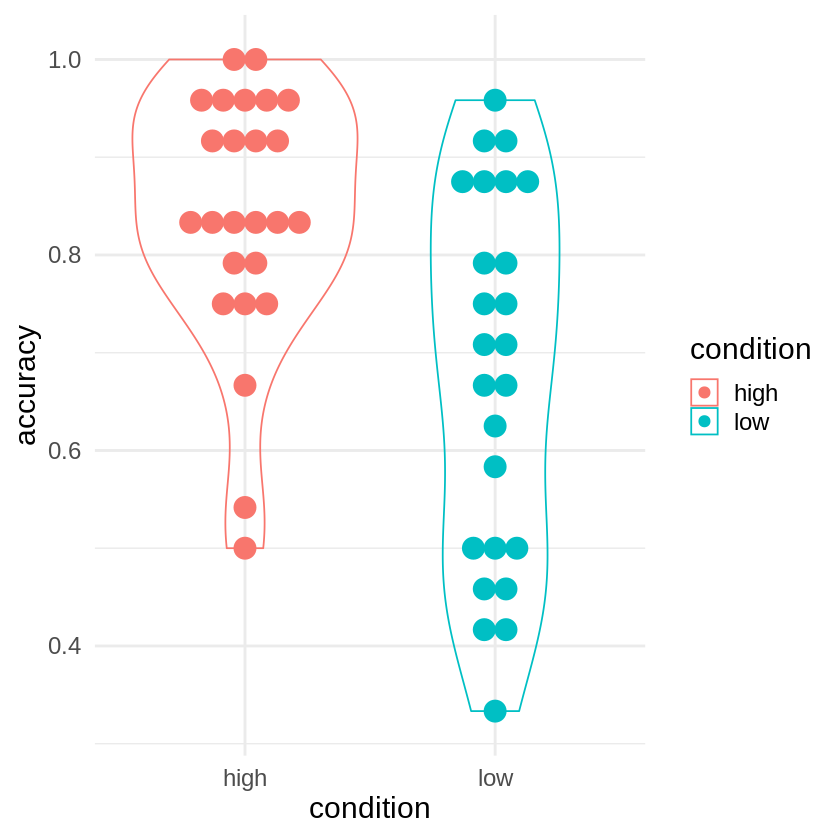

In [ ]:
ggplot(subj_1a, aes(condition,accuracy,color=condition,fill=condition))+
  geom_violin(fill=NA)+
  #geom_jitter()+
  geom_dotplot(binaxis="y",stackdir="center")

###4.5. More advanced summarizing

What if I'm interested in how accuracy changes across blocks, again for Experiment 1A? Now, I can also group by `block_num`.

In the code below, why do I first group by `subject` and then by `block_num`?

In [ ]:
subj_block_1a <- nameability_data |>
  filter(experiment == "1A") |>
  group_by(condition,subject, block_num) |>
  summarize(
    accuracy=mean(is_right)
  )
subj_block_1a


`summarise()` has grouped output by 'condition', 'subject'. You can override
using the `.groups` argument.


condition,subject,block_num,accuracy
<chr>,<chr>,<dbl>,<dbl>
high,p20905,1,0.875
high,p20905,2,1.000
high,p20905,3,1.000
high,p213384,1,1.000
high,p213384,2,1.000
high,p213384,3,1.000
high,p299672,1,0.750
high,p299672,2,0.875
high,p299672,3,0.875


Finally, it would be helpful to use the participant-level compute the group-level means for each condition, along with error bars (to give a sense of variability).

Go through each line. Can you figure out what each one is doing?

Notes:
* we introduce a couple of new functions here:
  * `sd()`: computes the standard deviation
  * `sqrt()`: computes the square root
* we compute the standard error of the mean (`sem`) using the following formula:

$SEM = \frac{SD}{\sqrt{N}}$



In [ ]:
#compute the overall group mean by condition and block
#also compute the standard error of the mean
group_means_1a <- subj_block_1a |>
  group_by(condition,block_num) |>
  summarise(mean_correct = mean(accuracy),
            sd_correct = sd(accuracy),
            n_obs = n(),
            sem = sd_correct / sqrt(n_obs))
group_means_1a

`summarise()` has grouped output by 'condition'. You can override using the
`.groups` argument.


condition,block_num,mean_correct,sd_correct,n_obs,sem
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
high,1,0.750,0.1692508,25,0.03385016
high,2,0.865,0.1484293,25,0.02968586
high,3,0.905,0.1542792,25,0.03085585
low,1,0.600,0.2072890,25,0.04145781
low,2,0.695,0.2340762,25,0.04681524
low,3,0.735,0.2347428,25,0.04694855


Let's plot it!

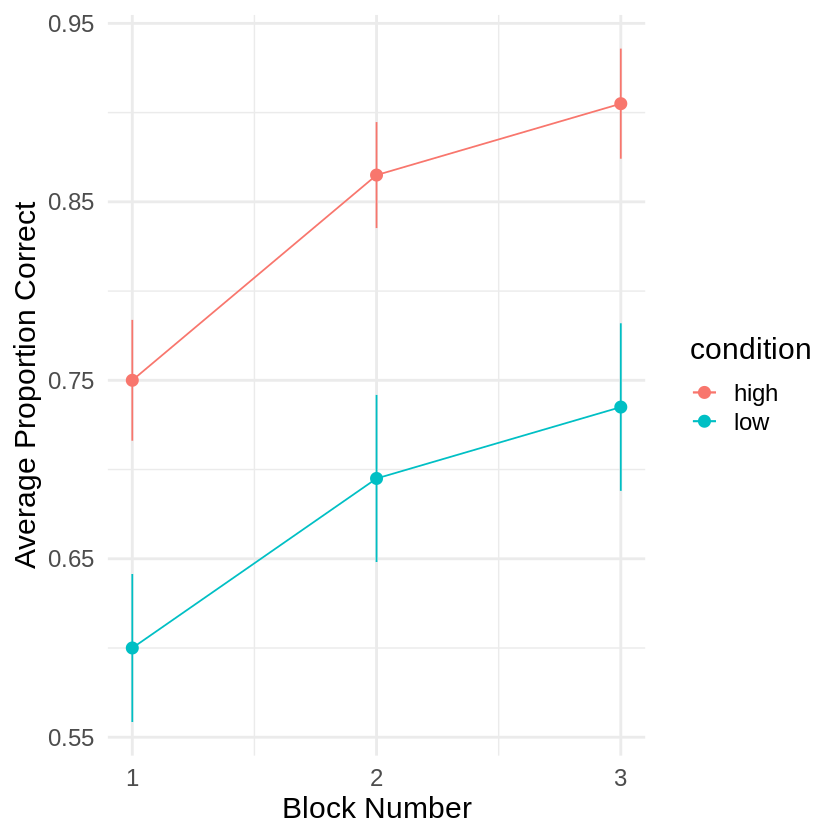

In [ ]:
ggplot(group_means_1a,aes(block_num,mean_correct,color=condition))+
  geom_errorbar(aes(ymin=mean_correct-sem,ymax=mean_correct+sem),width=0)+
  geom_line()+
  geom_point(size=3)+
  xlab("Block Number")+
  ylab("Average Proportion Correct")+
  scale_x_continuous(breaks=c(1,2,3))